# COVID-19 Prediction task

## Importing modules

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



## Global constants and plot settings

In [62]:
DATA_DIR = 'covid19-global-forecasting-week-3/'
FIG_SIZE = (6,4)
myFmt = mdates.DateFormatter('%m-%d')


## Loading train and test data

In [7]:
# Training raw dataset
train_ds = pd.read_csv(DATA_DIR+'train.csv')
# Testing dataset
test_ds = pd.read_csv(DATA_DIR+'test.csv')

## Initial inspections on the dataset

In [19]:
train_ds.info()
print('\n---------------------------------------\n')
print('No. of Countries : {}'.format(train_ds['Country_Region'].nunique() ))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21726 entries, 0 to 21725
Data columns (total 6 columns):
Id                21726 non-null int64
Country_Region    21726 non-null object
Province_State    9230 non-null object
Date              21726 non-null object
ConfirmedCases    21726 non-null float64
Fatalities        21726 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1018.5+ KB

---------------------------------------

No. of Countries : 180


In [51]:
ds_india = train_ds[train_ds['Country_Region']=='India']
ds_india['Date'] = pd.to_datetime(ds_india['Date'])

ds_usa = train_ds[train_ds['Country_Region']=='US']

ds_usa['Date'] = pd.to_datetime(ds_usa['Date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
Id                0 non-null int64
Country_Region    0 non-null object
Province_State    0 non-null object
Date              0 non-null datetime64[ns]
ConfirmedCases    0 non-null float64
Fatalities        0 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 80.0+ bytes


In [36]:
dates = pd.to_datetime(['2020-03-19','2020-03-20','2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01' ])
max_temp = np.array([28.2, 30.0, 30.0, 29.0, 30.0, 31.5, 31.8, 32.0, 27.0, 26.2, 27.5, 29.0, 29.4, 32.0])
min_temp = np.array([14.2, 14.6, 15.8, 13.8, 15.2, 17.2, 15.2, 18.2, 18.5, 14.5, 16.2, 15.4, 16.4, 16.4])

Text(0, 0.5, 'US, confirmed cases')

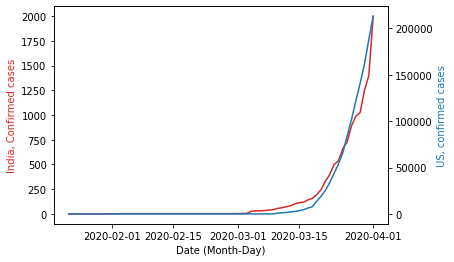

In [63]:
fig = plt.figure(figsize=FIG_SIZE)
ax = fig.add_subplot(111)
color = 'tab:red'
ax.plot(ds_india['Date'],ds_india['ConfirmedCases'],c=color)
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Date (Month-Day)')
ax.set_ylabel('India, Confirmed cases',color=color)

ax2 = ax.twinx()
color = 'tab:blue'
ax2.plot(ds_india['Date'],ds_usa.groupby(['Date']).agg({'ConfirmedCases':['sum']}),c=color)
ax2.set_ylabel('US, confirmed cases',color=color)